## Clustering Usak Natural Gas Consumption



### DEFNE TURĞUT 221805084

### DATA ANALYSE

In [1]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option("display.max_rows", None)  # Tüm satırları göstermek için
pd.set_option("display.max_columns", None)  # Tüm sütunları göstermek için 
#exceldeki veriyi oku
data = pd.read_excel("01-Clustering Usak Natural Gas Consumption.xlsx")
data.head(10)

Year  Jan usd/tr  Feb usd/tr  Mar usd/tr  Apr usd/tr  May usd/tr  \
0  2015      2.3449      2.4236      2.5187      2.6008      2.7109   
1  2015      2.3449      2.4236      2.5187      2.6008      2.7109   
2  2018      3.7652      3.7567      3.8082      3.9577      4.1208   
3  2016      2.9422      2.9671      2.9451      2.8197      2.7928   
4  2016      2.9422      2.9671      2.9451      2.8197      2.7928   
5  2017      3.5338      3.7746      3.6313      3.6375      3.5348   
6  2015      2.3449      2.4236      2.5187      2.6008      2.7109   
7  2017      3.5338      3.7746      3.6313      3.6375      3.5348   
8  2018      3.7652      3.7567      3.8082      3.9577      4.1208   
9  2015      2.3449      2.4236      2.5187      2.6008      2.7109   

   Jun usd/tr  Jul usd/tr  Aug usd/tr  Sep usd/tr  Oct usd/tr  Nov usd/tr  \
0      2.6762      2.6992      2.7736      2.9147      3.0174      2.8035   
1      2.6762      2.6992      2.7736      2.9147      3.0174      2.8035   
2      4.5922      4.6225      4.9223      6.6213      5.9659      5.5704   
3      2.9489      2.8846      2.9797      2.9558      3.0036      3.0981   
4      2.9489      2.8846      2.9797      2.9558      3.0036      3.0981   
5      3.5312      3.5305      3.5169      3.4264      3.5757      3.8080   
6      2.6762      2.6992      2.7736      2.9147      3.0174      2.8035   
7      3.5312      3.5305      3.5169      3.4264      3.5757      3.8080   
8      4.5922      4.6225      4.9223      6.6213      5.9659      5.5704   
9      2.6762      2.6992      2.7736      2.9147      3.0174      2.8035   

   Dec usd/tr  longitude   latitude    Jan    Feb    Mar    Apr   May    Jun  \
0      2.8923  29.411158  38.678461   0.00   0.00   0.00   0.00  0.00   0.00   
1      2.8923  29.410047  38.673379   0.00   0.00   0.00   0.00  0.00   0.00   
2      5.1906  29.391510  38.642617  12.34  13.36   9.51  12.25  7.44   8.30   
3      3.4483  29.416165  38.668711   0.00  76.38   0.00   0.00  0.00   7.50   
4      3.4483  29.365950  38.674620   0.00  17.10   0.00  14.30  9.36  12.03   
5      3.9324  29.353166  38.671651   0.00   0.00   0.00   0.00  0.00   0.00   
6      2.8923  29.400094  38.642237   0.00   0.00   0.00   0.00  0.00   0.00   
7      3.9324  29.396964  38.666167  10.39   7.60  10.42   7.54  8.40   6.44   
8      5.1906  29.417103  38.661209   0.00   0.00   0.00   0.00  0.00   0.00   
9      2.8923  29.395292  38.686253   0.00  12.36   8.58   7.60  8.43  10.18   

     Jul    Aug    Sep    Oct    Nov     Dec   Total  
0   0.00   0.00   0.00   0.00  24.85   75.15  100.00  
1   0.00  13.99  31.41  10.88   0.00   43.73  100.01  
2  11.91   0.00   5.40   5.46   7.43    6.61  100.01  
3   0.00  16.14   0.00   0.00   0.00    0.00  100.02  
4   8.23  17.98   0.00   0.00   0.00   21.02  100.02  
5   0.00   0.00   0.00   0.00   0.00  100.02  100.02  
6  11.97  16.24   8.07  19.94  23.08   20.73  100.03  
7   0.00  13.50   6.24   8.13   6.42   14.96  100.04  
8   0.00   0.00   0.00   0.00  13.04   87.00  100.04  
9   8.21   8.10   8.08  10.87   6.41   11.23  100.05

In [ ]:
#dataset genel bilgileri yazdır
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215871 entries, 0 to 215870
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        215871 non-null  int64  
 1   Jan usd/tr  215871 non-null  float64
 2   Feb usd/tr  215871 non-null  float64
 3   Mar usd/tr  215871 non-null  float64
 4   Apr usd/tr  215871 non-null  float64
 5   May usd/tr  215871 non-null  float64
 6   Jun usd/tr  215871 non-null  float64
 7   Jul usd/tr  215871 non-null  float64
 8   Aug usd/tr  215871 non-null  float64
 9   Sep usd/tr  215871 non-null  float64
 10  Oct usd/tr  215871 non-null  float64
 11  Nov usd/tr  215871 non-null  float64
 12  Dec usd/tr  215871 non-null  float64
 13  longitude   215871 non-null  float64
 14  latitude    215871 non-null  float64
 15  Jan         215865 non-null  float64
 16  Feb         212468 non-null  float64
 17  Mar         212468 non-null  float64
 18  Apr         212468 non-null  float64
 19  Ma

In [ ]:
#dataset satır ve sütun sayısı yazdır
data.shape

(215871, 28)

In [ ]:
#ilk 20 sütun ismini listele
print(data.columns.tolist()[:20]) 

['Year', 'Jan usd/tr', 'Feb usd/tr', 'Mar usd/tr', 'Apr usd/tr', 'May usd/tr', 'Jun usd/tr', 'Jul usd/tr', 'Aug usd/tr', 'Sep usd/tr', 'Oct usd/tr', 'Nov usd/tr', 'Dec usd/tr', 'longitude', 'latitude', 'Jan', 'Feb', 'Mar', 'Apr', 'May']


In [ ]:
pd.set_option("display.max_rows", None)  # Tüm satırları göstermek için
pd.set_option("display.max_columns", None)  # Tüm sütunları göstermek için 
#Her sütundaki null değer sayısını yazdır
print("Eksik değerler:")
data.isnull().sum().sort_values(ascending=False)

Eksik değerler:


Feb           3403
Mar           3403
Apr           3403
May           3403
Jun           3403
Oct           1958
Nov            809
Jan              6
Aug              5
Jul              5
Sep              5
Year             0
Nov usd/tr       0
Oct usd/tr       0
Sep usd/tr       0
Aug usd/tr       0
Jul usd/tr       0
Jun usd/tr       0
May usd/tr       0
Apr usd/tr       0
Mar usd/tr       0
Feb usd/tr       0
Jan usd/tr       0
latitude         0
longitude        0
Dec usd/tr       0
Dec              0
Total            0
dtype: int64

In [ ]:
# 0 içeren sütunları yazdır
zero_values = (data == 0).sum()
print("Sıfır Değerler:\n", zero_values[zero_values > 0].sort_values(ascending=False))

Sıfır Değerler:
 Aug    78432
Sep    67962
Jul    54201
Jun    39489
Feb    37371
May    33199
Apr    32724
Oct    31892
Jan    29881
Nov    26749
Mar    26240
Dec    13033
dtype: int64


In [ ]:
#veri setinin sayısal sütunlarının istatistik bilgilerini incele
data.describe()

Year     Jan usd/tr     Feb usd/tr     Mar usd/tr  \
count  215871.000000  215871.000000  215871.000000  215871.000000   
mean     2016.652353       3.220637       3.304057       3.295384   
std         1.106848       0.536891       0.551489       0.509410   
min      2015.000000       2.344900       2.423600       2.518700   
25%      2016.000000       2.942200       2.967100       2.945100   
50%      2017.000000       3.533800       3.756700       3.631300   
75%      2018.000000       3.765200       3.774600       3.808200   
max      2018.000000       3.765200       3.774600       3.808200   

          Apr usd/tr     May usd/tr     Jun usd/tr     Jul usd/tr  \
count  215871.000000  215871.000000  215871.000000  215871.000000   
mean        3.328449       3.365425       3.533224       3.531566   
std         0.557749       0.583509       0.749049       0.768753   
min         2.600800       2.710900       2.676200       2.699200   
25%         2.819700       2.792800       2.948900       2.884600   
50%         3.637500       3.534800       3.531200       3.530500   
75%         3.957700       4.120800       4.592200       4.622500   
max         3.957700       4.120800       4.592200       4.622500   

          Aug usd/tr     Sep usd/tr     Oct usd/tr    Nov usd/tr  \
count  215871.000000  215871.000000  215871.000000  215871.00000   
mean        3.653970       4.154620       4.033019       3.95661   
std         0.863002       1.608852       1.271949       1.10410   
min         2.773600       2.914700       3.003600       2.80350   
25%         2.979700       2.955800       3.017400       3.09810   
50%         3.516900       3.426400       3.575700       3.80800   
75%         4.922300       6.621300       5.965900       5.57040   
max         4.922300       6.621300       5.965900       5.57040   

          Dec usd/tr      longitude       latitude            Jan  \
count  215871.000000  215871.000000  215871.000000  215865.000000   
mean        3.977957      29.441079      38.666784     223.975373   
std         0.860788       0.488457       0.170419     596.151323   
min         2.892300      27.047201      36.363464       0.000000   
25%         3.448300      29.392015      38.662318      35.230000   
50%         3.932400      29.400228      38.669479     182.860000   
75%         5.190600      29.409796      38.677271     282.400000   
max         5.190600      42.762756      41.957470   76901.930000   

                 Feb            Mar            Apr            May  \
count  212468.000000  212468.000000  212468.000000  212468.000000   
mean      190.948255     168.100743     115.310356      58.514961   
std       528.984267     450.584720     319.450065     386.134018   
min         0.000000       0.000000       0.000000  -35094.431305   
25%        22.780000      32.320000      22.510000      13.100000   
50%       155.620000     127.925000      82.020000      30.600000   
75%       248.600000     203.280000     146.440000      64.530000   
max     89923.880000   47445.010000   35362.669096  136327.593595   

                 Jun            Jul            Aug            Sep  \
count  212468.000000  215866.000000  215866.000000  215866.000000   
mean       31.652149      20.429195      14.726043      18.291155   
std       127.374356     124.559000     105.474770     121.713369   
min         0.000000       0.000000       0.000000       0.000000   
25%         8.480000       0.000000       0.000000       0.000000   
50%        19.430000      12.830000       9.000000      11.590000   
75%        33.850000      21.940000      17.040000      19.820000   
max     16407.000000   26148.243576   19204.090000   18423.180000   

                 Oct            Nov            Dec          Total  
count  213913.000000  215062.000000  215871.000000  215871.000000  
mean       33.654402      95.393391     189.567113    1150.993702  
std       180.748330     337.195223     546.776543    2905.919813  
min         0.000000 

In [9]:
# Aylık tüketim kolonlarını al (sadece m3 cinsinden olanlar)
monthly_cols = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

usd_cols = [col for col in data.columns if "usd/tr" in col]

### Consumption Pattern-Based Clustering


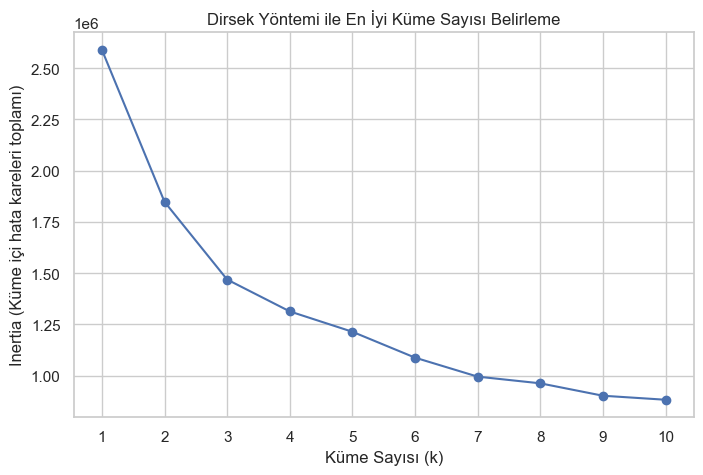

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Tüketim yüzdelerini normalize et (aylık oranlar zaten toplam 100 civarı)
consumption_df = data[monthly_cols].copy()
# Tamamen 0 olan sütunları bul
consumption_df = consumption_df[~(consumption_df == 0).all(axis=1)]

# 0 olanları NaN ile değiştir
consumption_df = consumption_df.replace(0, np.nan)

# NaN değerleri aylık ortalamalarla doldur
consumption_df = consumption_df.fillna(consumption_df.mean())

# PCA ile görselleştirme için ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(consumption_df)

# 5. Dirsek yöntemiyle inertia değerlerini topla
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 6. Dirsek grafiği çiz
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.plot(K_range, inertias, marker='o')
plt.title("Dirsek Yöntemi ile En İyi Küme Sayısı Belirleme")
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia (Küme içi hata kareleri toplamı)")
plt.xticks(K_range)
plt.show()


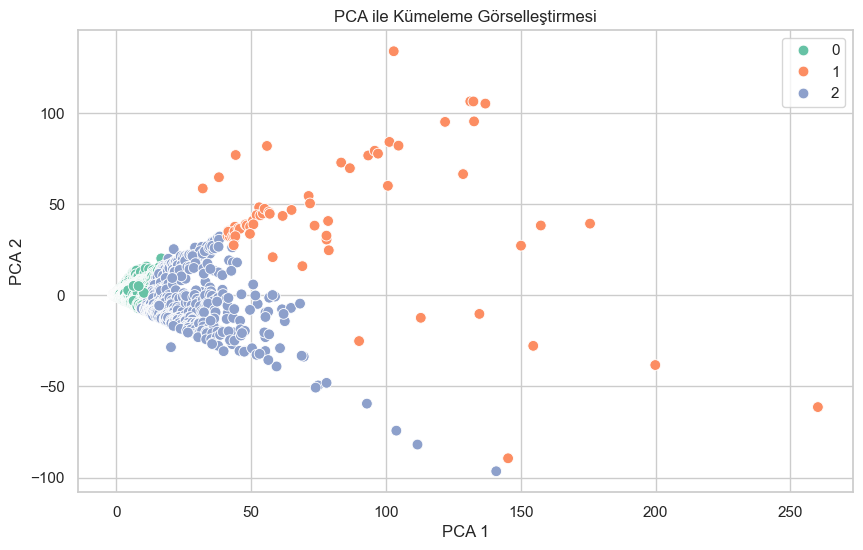

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
data['consumption_cluster'] = labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=60)
plt.title("PCA ile Kümeleme Görselleştirmesi")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()



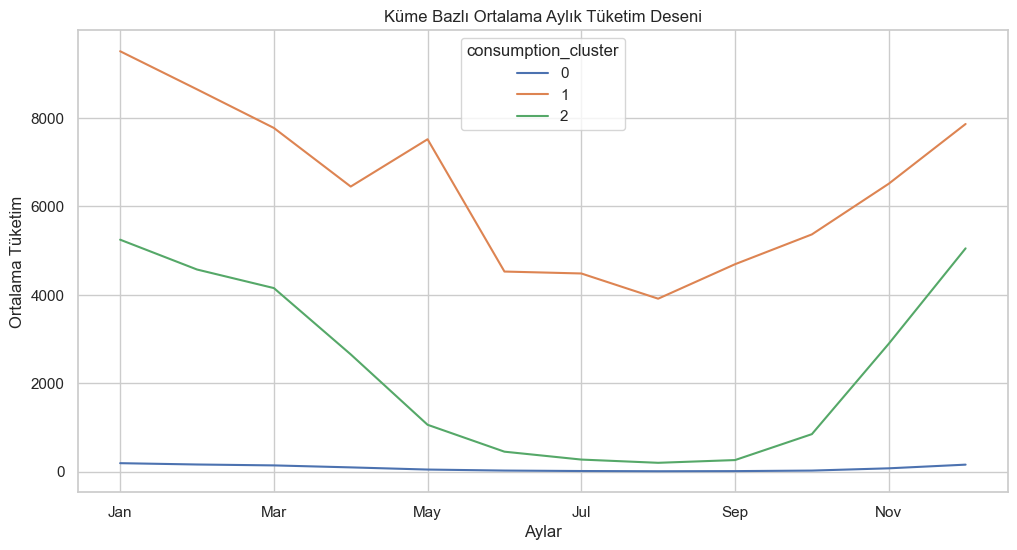

In [12]:
cluster_profiles = data.groupby('consumption_cluster')[monthly_cols].mean()
cluster_profiles.T.plot(figsize=(12, 6), title='Küme Bazlı Ortalama Aylık Tüketim Deseni')
plt.xlabel("Aylar")
plt.ylabel("Ortalama Tüketim")
plt.grid(True)
plt.show()


In [13]:
data['consumption_cluster'].value_counts().sort_index()


consumption_cluster
0    214688
1        68
2      1115
Name: count, dtype: int64

### Clustering Based on Exchange Rate Influence

In [ ]:
usd_df = data[usd_cols]  # Kur verilerini al

# Normalize edelim 
scaler = StandardScaler()
consumption_scaled = scaler.fit_transform(consumption_df)
usd_scaled = scaler.fit_transform(usd_df)


In [15]:
# Her satır (bir tüketici) için kendi tüketimi ile kur arasındaki Pearson korelasyonu
correlations = []

for i in range(consumption_scaled.shape[0]):
    corr = np.corrcoef(consumption_scaled[i], usd_scaled[i])[0, 1]
    correlations.append(corr)

data['exchange_correlation'] = correlations


In [16]:
# Sadece bu korelasyon skoru ile ya da diğerleriyle birleştirerek kullanabilirsin
X_cluster = np.array(correlations).reshape(-1, 1)  # Tek boyutlu bir vektör

# Ölçekleme (gerekirse)
X_cluster_scaled = scaler.fit_transform(X_cluster)


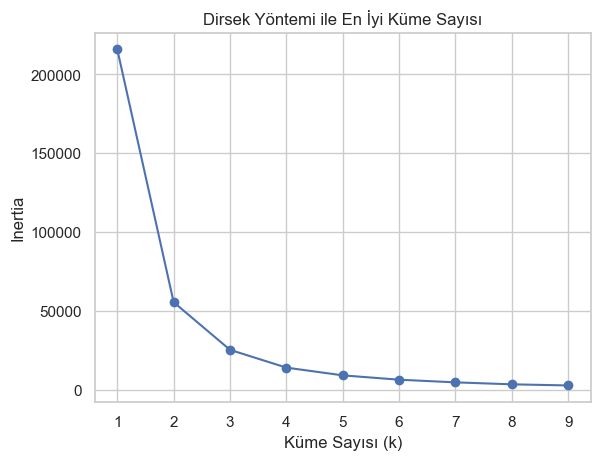

In [17]:
inertias = []

for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=13)
    km.fit(X_cluster_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.title("Dirsek Yöntemi ile En İyi Küme Sayısı")
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [18]:
kmeans = KMeans(n_clusters=3, random_state=13)
labels = kmeans.fit_predict(X_cluster_scaled)

data['exchange_cluster'] = labels


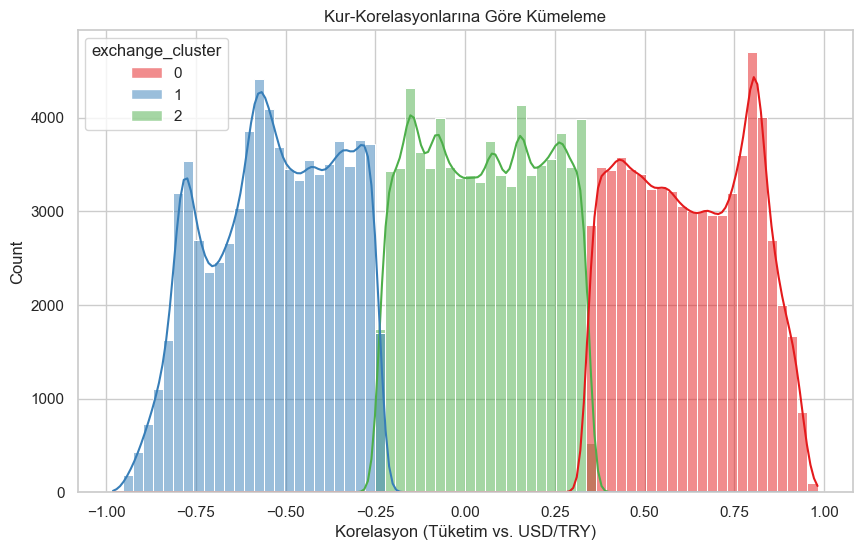

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='exchange_correlation', hue='exchange_cluster', kde=True, palette='Set1')
plt.title("Kur-Korelasyonlarına Göre Kümeleme")
plt.xlabel("Korelasyon (Tüketim vs. USD/TRY)")
plt.grid(True)
plt.show()


In [20]:
data.groupby('exchange_cluster')['exchange_correlation'].describe()


count      mean       std       min       25%       50%  \
exchange_cluster                                                              
0                 67732.0  0.626924  0.167937  0.341484  0.478284  0.625593   
1                 73732.0 -0.531945  0.177185 -0.980542 -0.670997 -0.528595   
2                 74407.0  0.052344  0.168548 -0.238235 -0.094859  0.053513   

                       75%       max  
exchange_cluster                      
0                 0.778693  0.981761  
1                -0.379370 -0.238239  
2                 0.199136  0.341471

###  Anomaly Detection


In [ ]:
from scipy.stats import zscore

# Tüketim verileri için Z-skorlarını hesapla
z_scores = zscore(consumption_df, axis=0)
z_scores_abs = abs(z_scores)
z_sum = z_scores_abs.sum(axis=1)

# Eşik değeri belirle 
threshold = z_sum.mean() + 3 * z_sum.std()
data['Anomaly_Z'] = z_sum > threshold


In [22]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=13)
data['Anomaly_IF'] = iso.fit_predict(X_scaled)
data['Anomaly_IF'] = data['Anomaly_IF'].map({1: 0, -1: 1})


In [26]:
# Küme başına yıllık ortalama tüketim
print(data.groupby('consumption_cluster')[consumption_df.columns].mean())

# Anomali olarak işaretlenen satırlar
anomalies = data[data['Anomaly_IF'] == 1]
print(f"Anomaliler: {anomalies}")


                             Jan          Feb          Mar          Apr  \
consumption_cluster                                                       
0                     194.971202   165.185503   144.698543    99.928101   
1                    9506.394991  8645.361891  7772.814589  6447.840877   
2                    5246.863949  4572.722281  4152.905946  2654.219966   

                             May          Jun          Jul          Aug  \
consumption_cluster                                                       
0                      50.857918    27.997210    17.686592    12.512275   
1                    7517.175943  4526.702444  4483.223889  3913.135403   
2                    1063.107062   454.901330   276.553979   203.387406   

                             Sep          Oct          Nov          Dec  
consumption_cluster                                                      
0                      15.529500    27.667567    78.774647   161.888415  
1                    4692.

### Geospatial Consumption Profiling

In [ ]:
import folium

# Harita başlangıç noktası (ortalama konum)
map_center = [data['latitude'].mean(), data['longitude'].mean()]

# Folium haritası oluştur
m = folium.Map(location=map_center, zoom_start=13)

# Renkler küme numarasına göre belirle
colors = ['red', 'blue', 'green']

# Her bir kullanıcı için haritaya bir işaretçi ekle
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,
        popup=f"Cluster: {row['consumption_cluster']}",
        color=colors[row['consumption_cluster']],
        fill=True,
        fill_color=colors[row['consumption_cluster']]
    ).add_to(m)

# Harita dosyasını kaydet
# m.save('geospatial_clusters_map.html')
